<a href="https://colab.research.google.com/github/rahelabrahamthomas/Exploratory_Data_Analysis/blob/main/22BDS0005.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


===== 1. Dimensions =====
Shape of dataset: (1070, 18)
Number of rows: 1070
Number of columns: 18

===== 2. Summary Statistics =====

--- Numeric Columns ---
       WeekofPurchase      StoreID      PriceCH      PriceMM       DiscCH  \
count     1070.000000  1069.000000  1069.000000  1066.000000  1068.000000   
mean       254.381308     3.956969     1.867428     2.085038     0.051957   
std         15.558286     2.308189     0.102017     0.134429     0.117563   
min        227.000000     1.000000     1.690000     1.690000     0.000000   
25%        240.000000     2.000000     1.790000     1.990000     0.000000   
50%        257.000000     3.000000     1.860000     2.090000     0.000000   
75%        268.000000     7.000000     1.990000     2.180000     0.000000   
max        278.000000     7.000000     2.090000     2.290000     0.500000   

            DiscMM    SpecialCH    SpecialMM      LoyalCH  SalePriceMM  \
count  1066.000000  1068.000000  1065.000000  1065.000000  1065.000000   

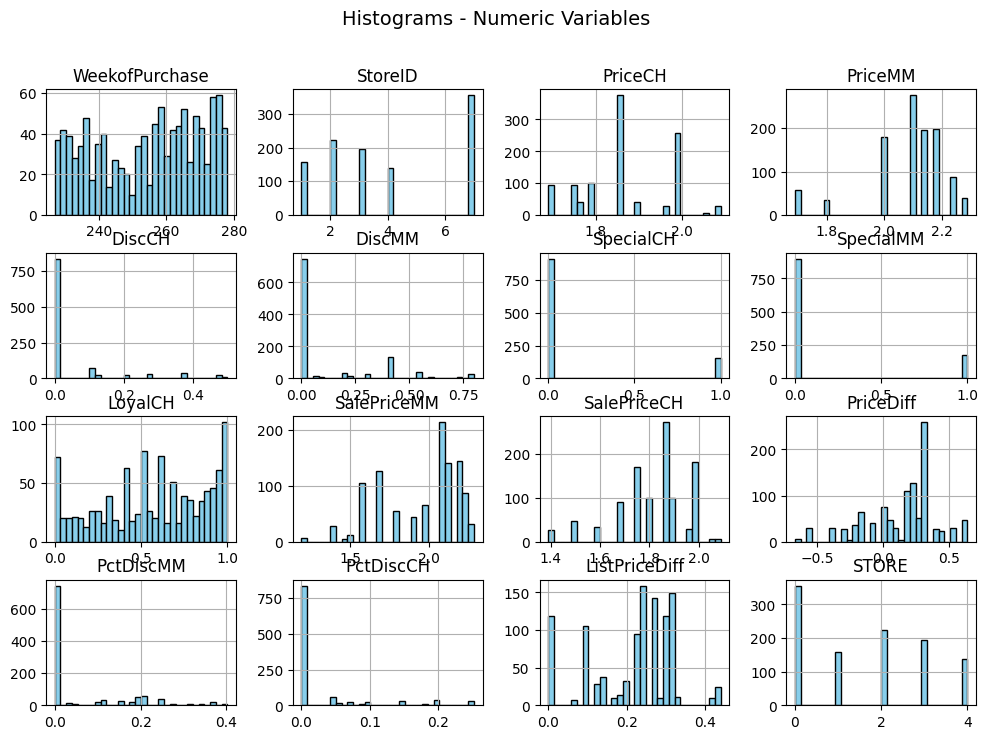

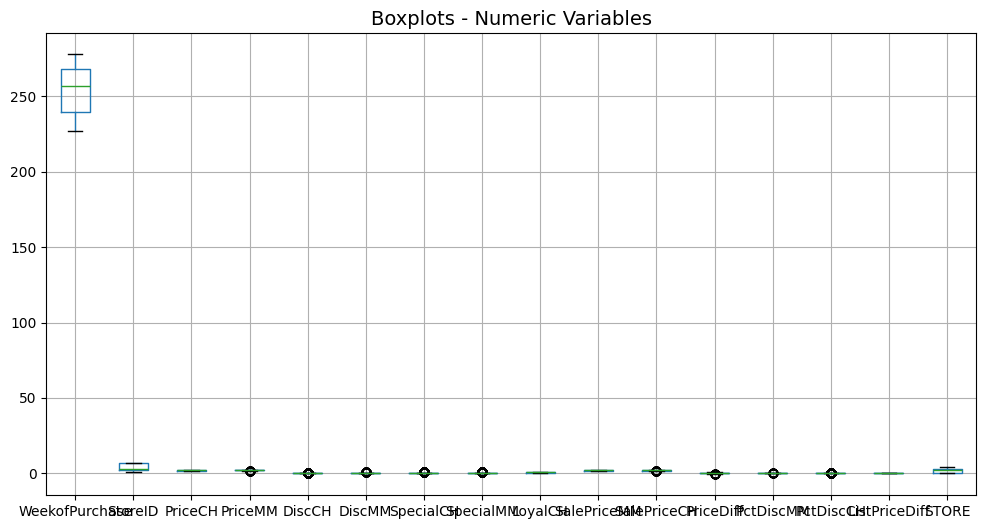

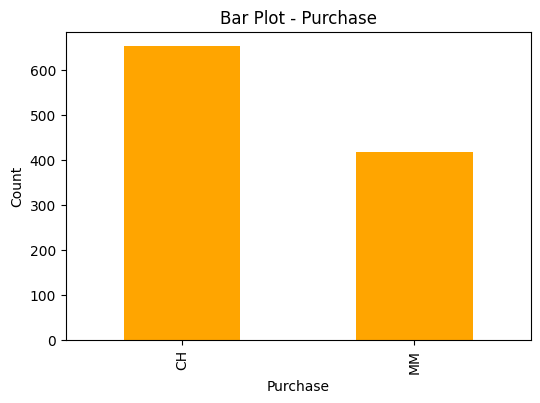

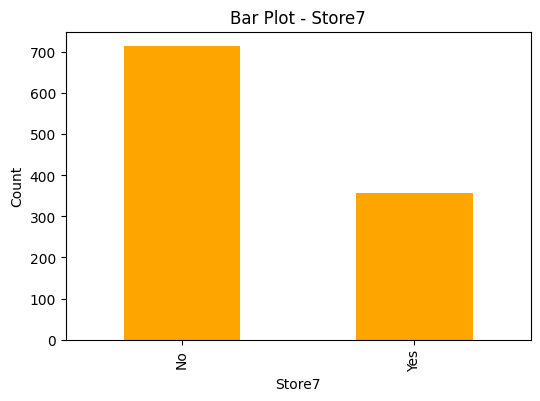


===== 6. Bivariate Analysis =====


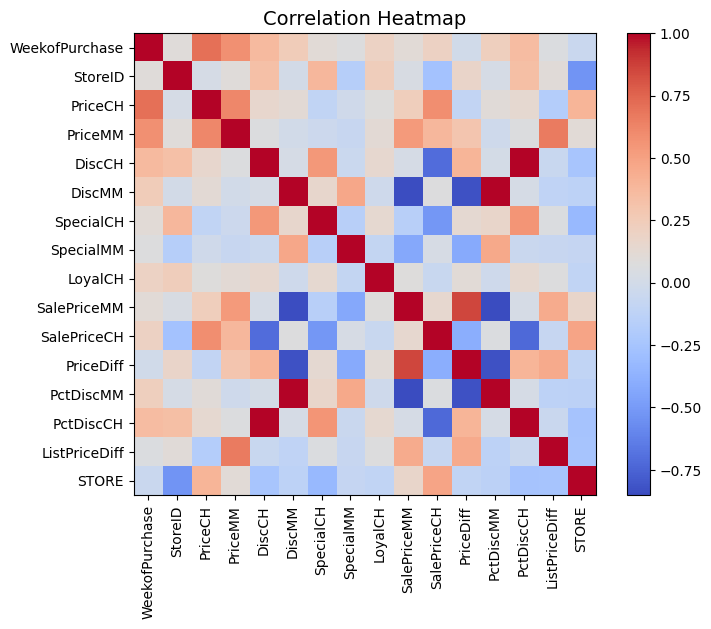

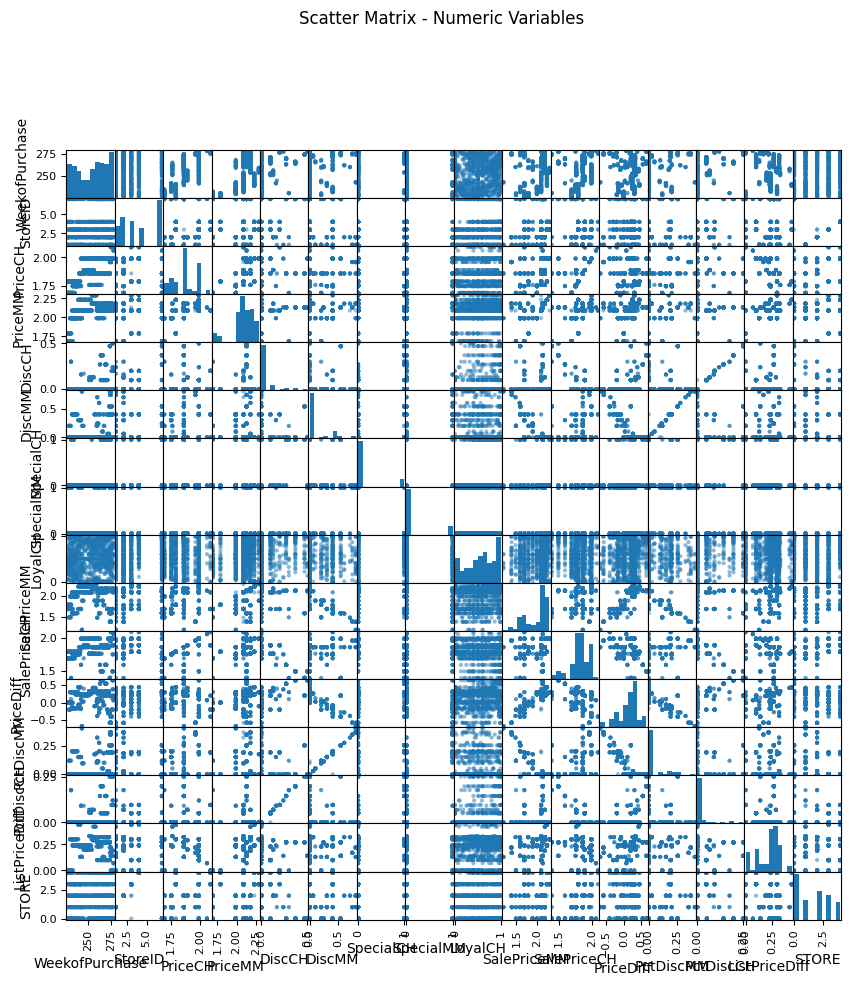

<Figure size 600x400 with 0 Axes>

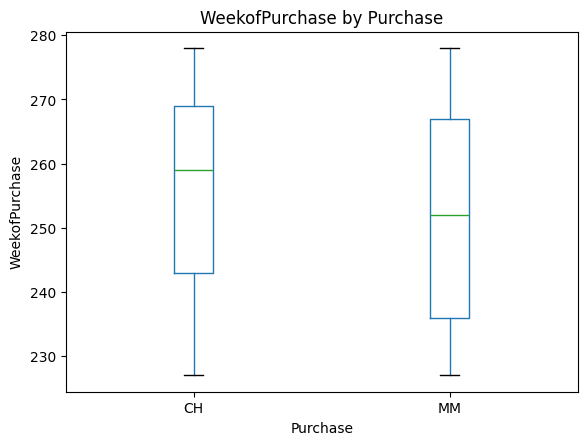

<Figure size 600x400 with 0 Axes>

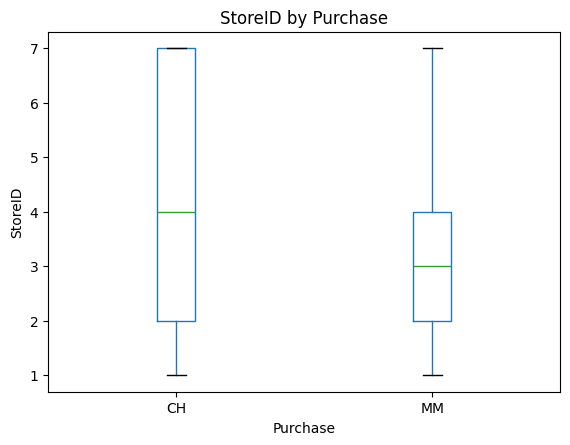

<Figure size 600x400 with 0 Axes>

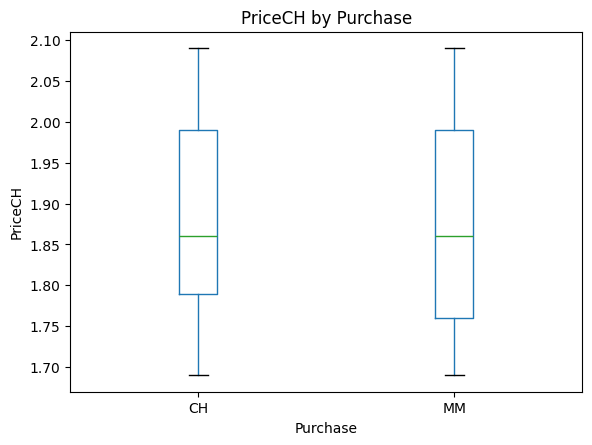

<Figure size 600x400 with 0 Axes>

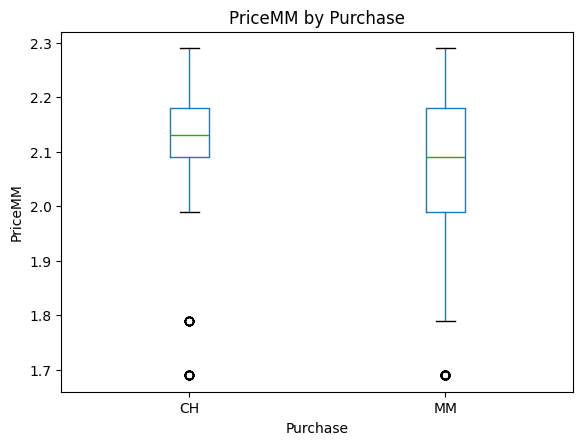

<Figure size 600x400 with 0 Axes>

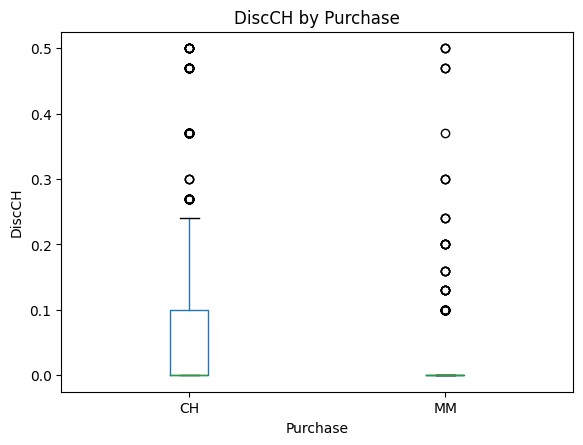

<Figure size 600x400 with 0 Axes>

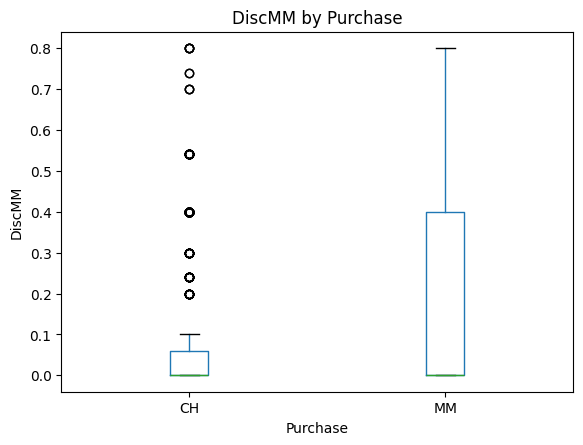

<Figure size 600x400 with 0 Axes>

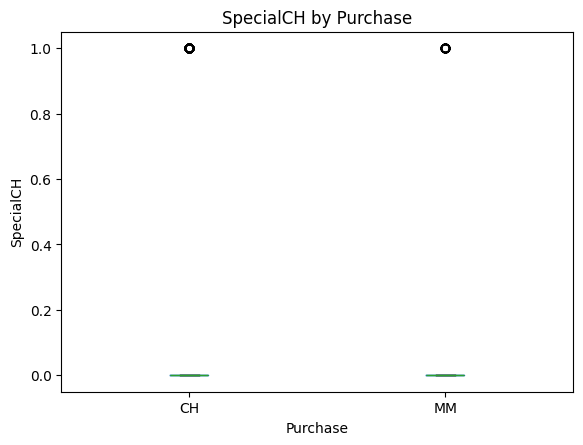

<Figure size 600x400 with 0 Axes>

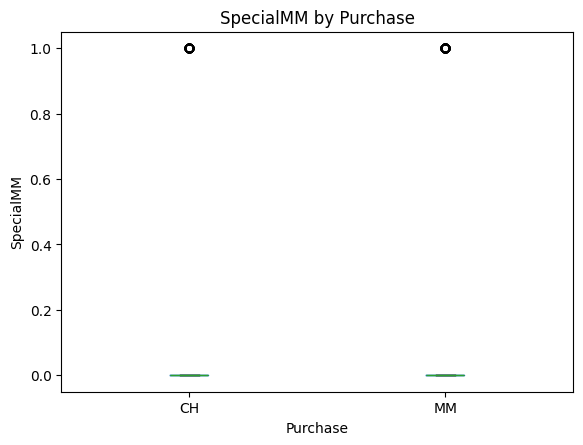

<Figure size 600x400 with 0 Axes>

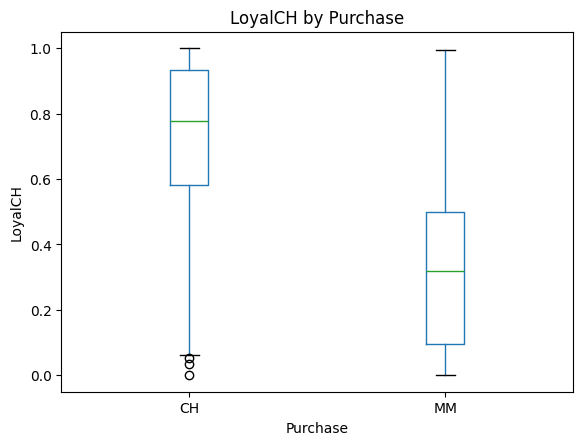

<Figure size 600x400 with 0 Axes>

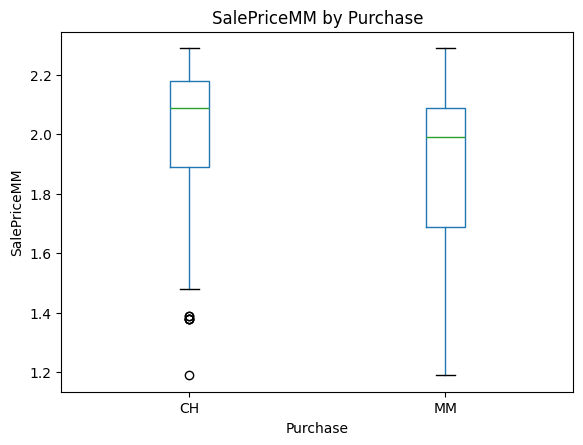

<Figure size 600x400 with 0 Axes>

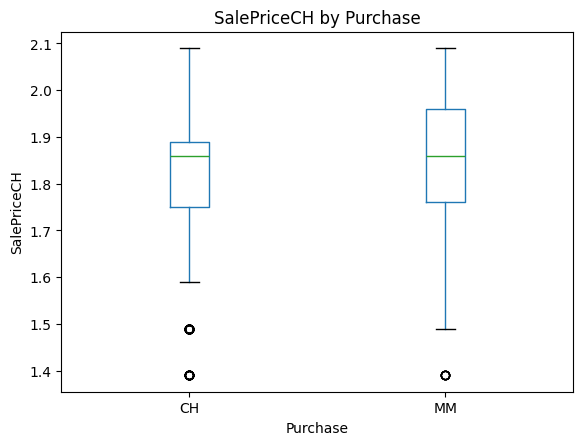

<Figure size 600x400 with 0 Axes>

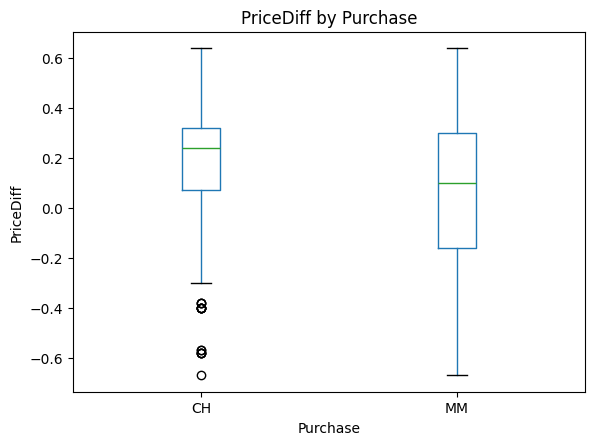

<Figure size 600x400 with 0 Axes>

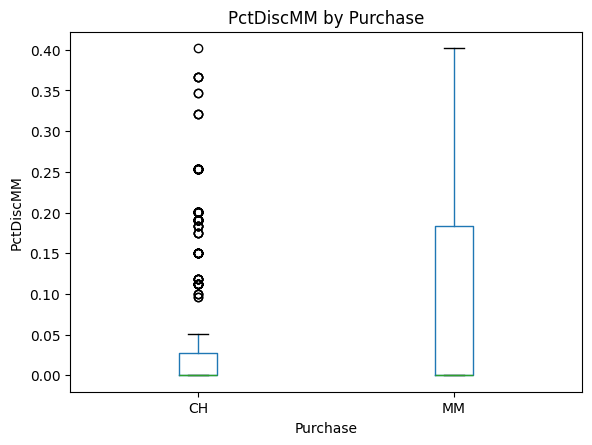

<Figure size 600x400 with 0 Axes>

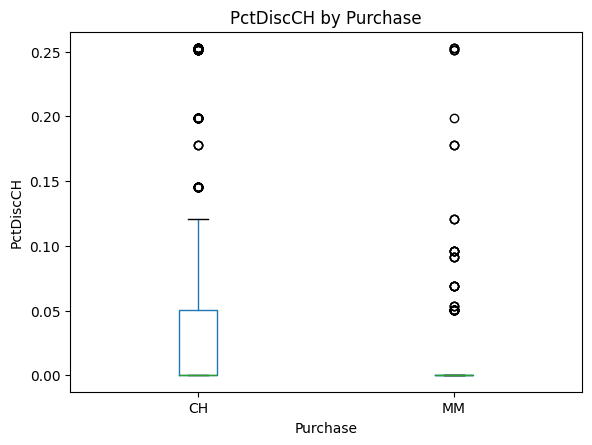

<Figure size 600x400 with 0 Axes>

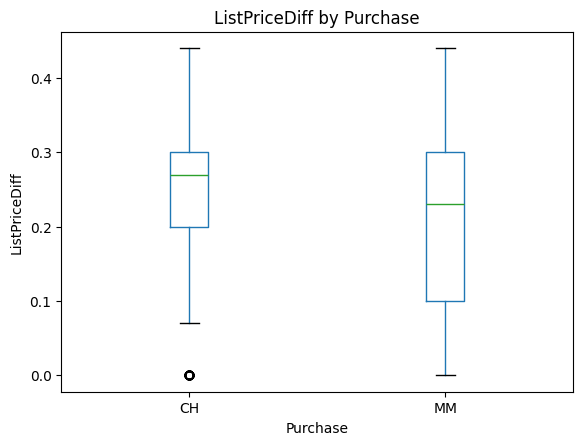

<Figure size 600x400 with 0 Axes>

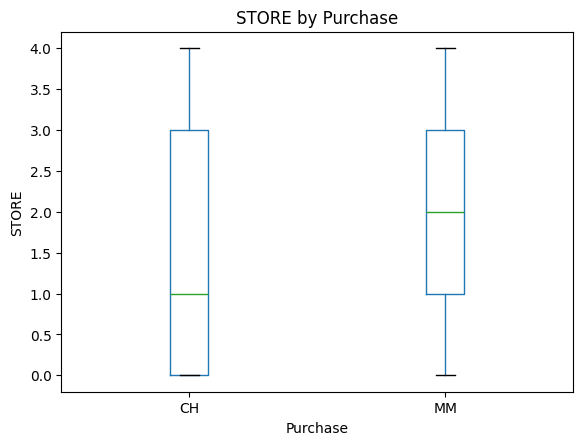

<Figure size 600x400 with 0 Axes>

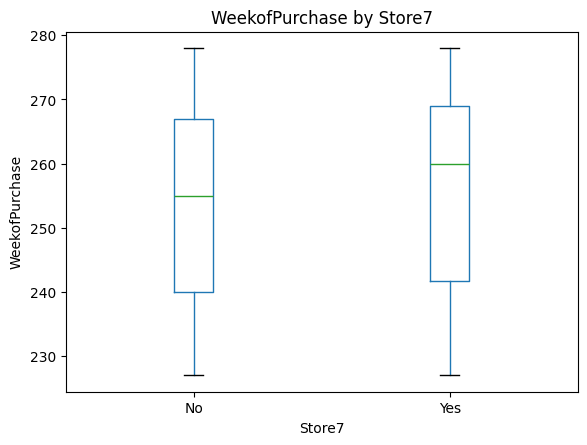

<Figure size 600x400 with 0 Axes>

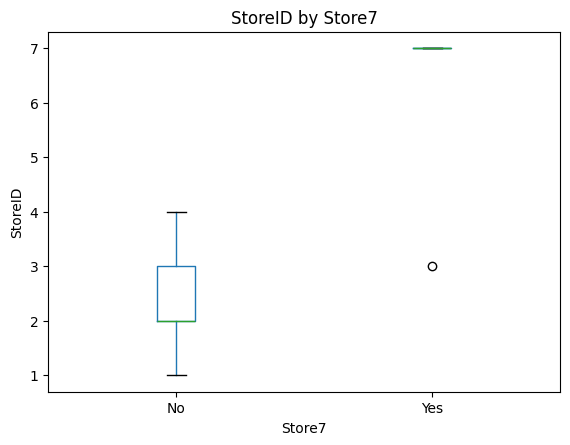

<Figure size 600x400 with 0 Axes>

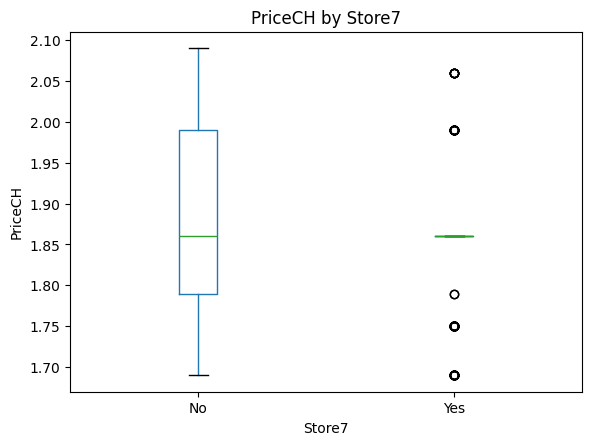

<Figure size 600x400 with 0 Axes>

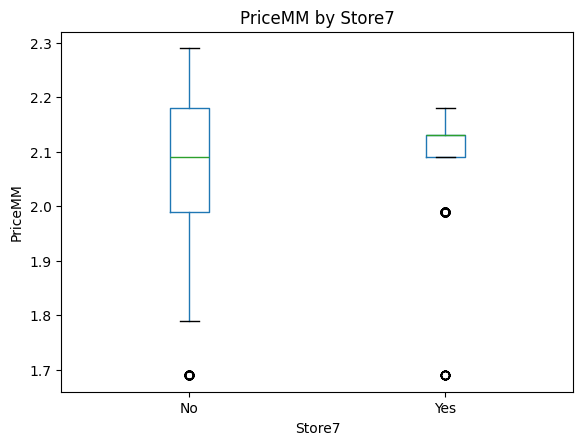

<Figure size 600x400 with 0 Axes>

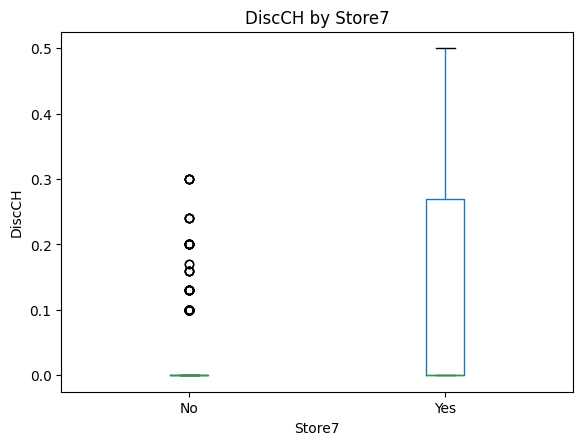

<Figure size 600x400 with 0 Axes>

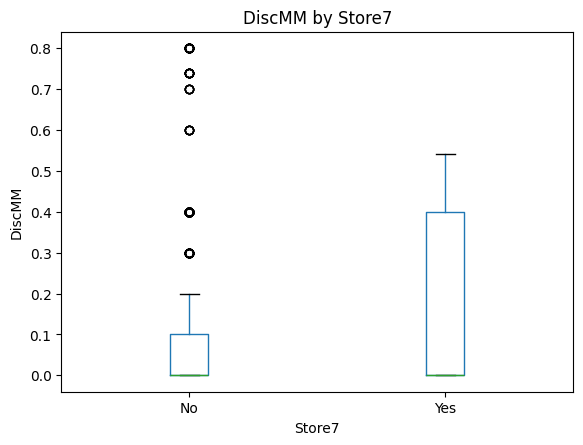

<Figure size 600x400 with 0 Axes>

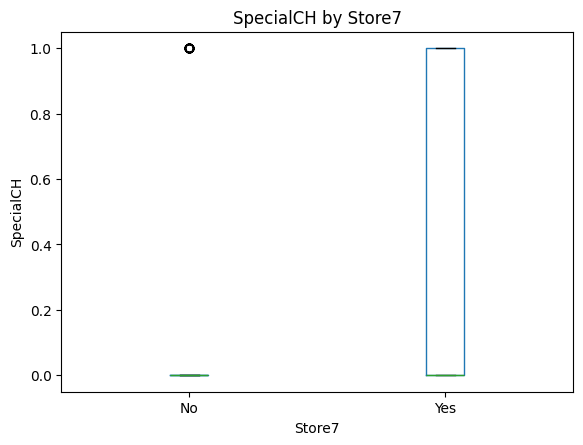

<Figure size 600x400 with 0 Axes>

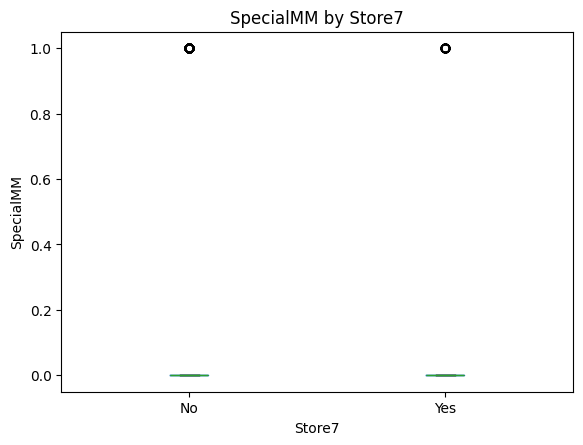

<Figure size 600x400 with 0 Axes>

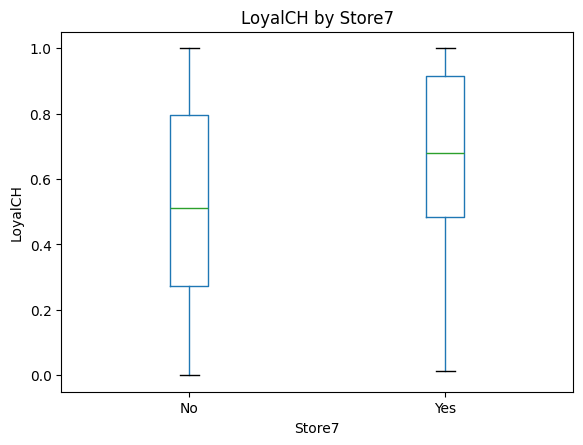

<Figure size 600x400 with 0 Axes>

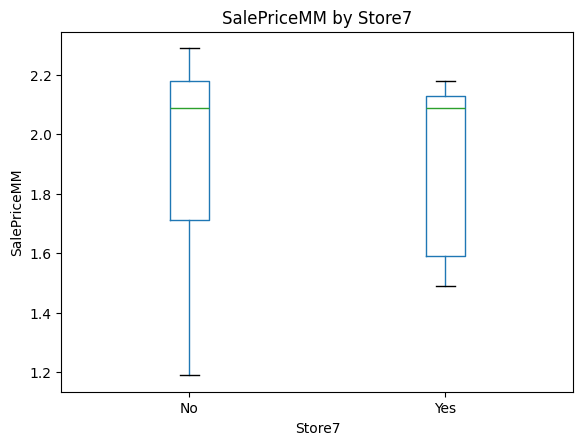

<Figure size 600x400 with 0 Axes>

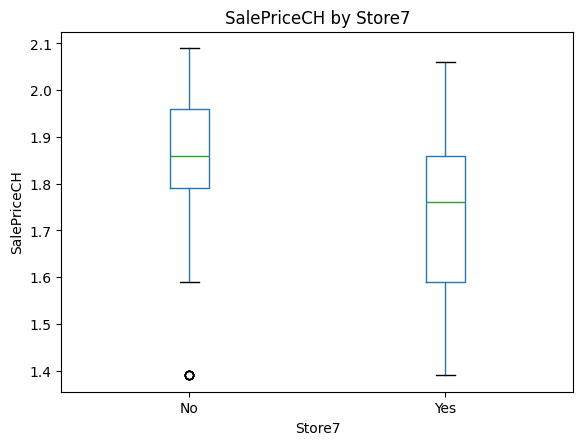

<Figure size 600x400 with 0 Axes>

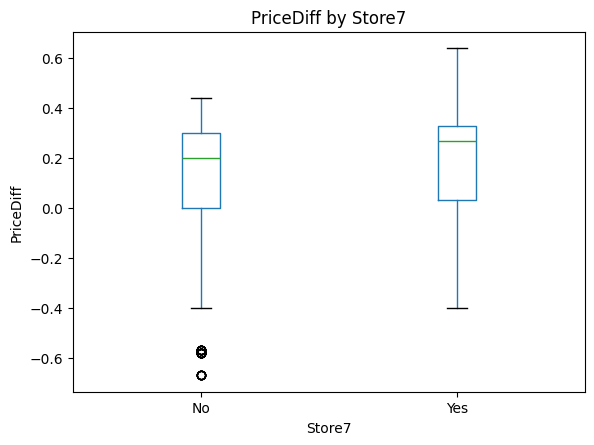

<Figure size 600x400 with 0 Axes>

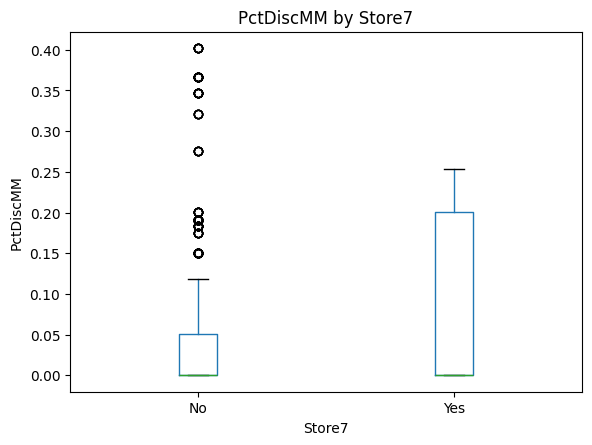

<Figure size 600x400 with 0 Axes>

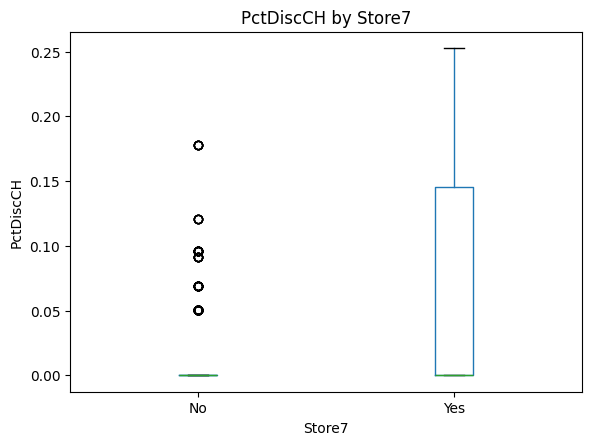

<Figure size 600x400 with 0 Axes>

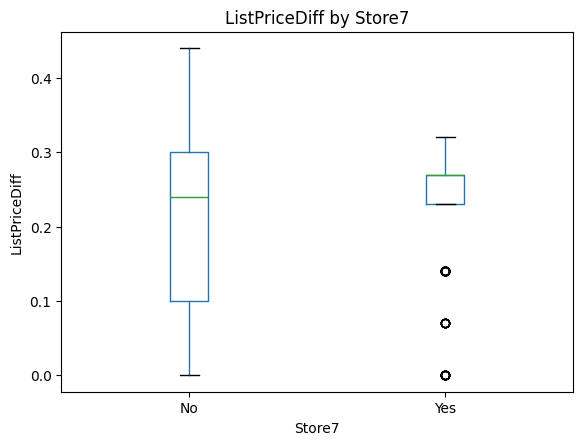

<Figure size 600x400 with 0 Axes>

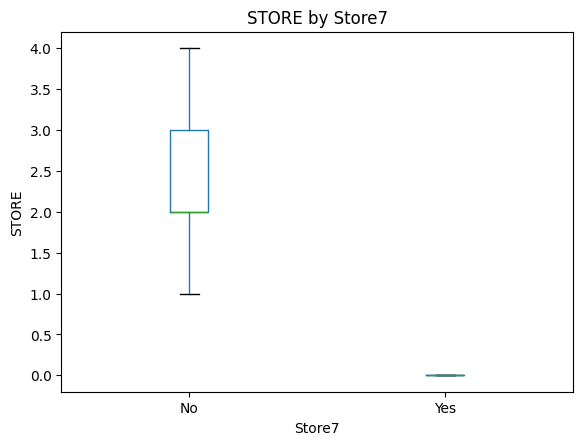

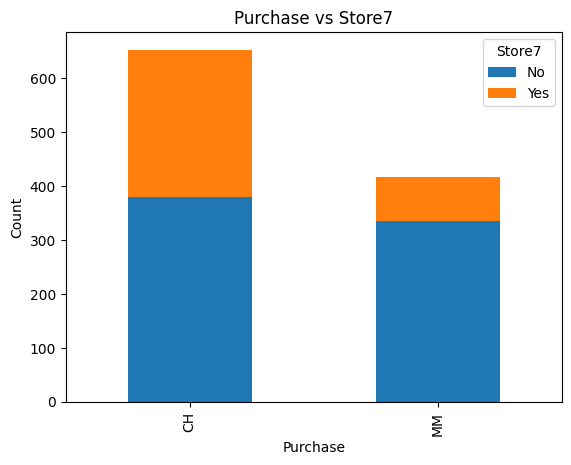


===== 7. Multivariate Analysis =====


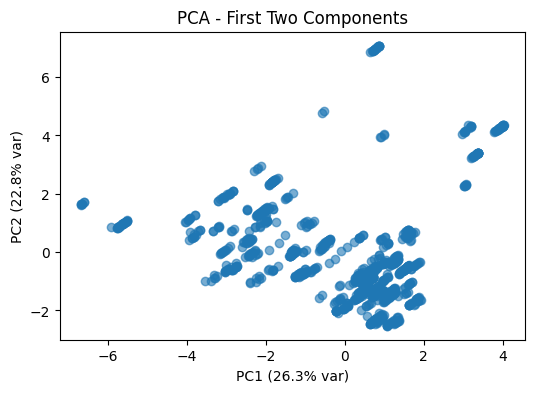

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

%matplotlib inline

# -----------------------
# Load Dataset
# -----------------------
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/orange_juice_withmissing.csv"
df = pd.read_csv(url)

# =====================================================
# 1. Dimensions
# =====================================================
print("\n===== 1. Dimensions =====")
print(f"Shape of dataset: {df.shape}")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

# =====================================================
# 2. Summary Statistics
# =====================================================
print("\n===== 2. Summary Statistics =====")
print("\n--- Numeric Columns ---")
print(df.describe())

print("\n--- Categorical Columns ---")
print(df.describe(include='object'))

# =====================================================
# 3. Data Handling (Missing Values & Duplicates)
# =====================================================
print("\n===== 3. Data Handling =====")
print("\nMissing values count:")
print(df.isna().sum())

print("\nDuplicate rows count:", df.duplicated().sum())

# Separate numeric and categorical columns
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()

# =====================================================
# 4. Data Cleaning
# =====================================================
print("\n===== 4. Data Cleaning =====")
df_clean = df.copy()

# Impute numeric with median, categorical with most frequent
if num_cols:
    df_clean[num_cols] = SimpleImputer(strategy="median").fit_transform(df_clean[num_cols])
if cat_cols:
    df_clean[cat_cols] = SimpleImputer(strategy="most_frequent").fit_transform(df_clean[cat_cols])

print("Missing values after cleaning:")
print(df_clean.isna().sum())

# =====================================================
# 5. Univariate Analysis
# =====================================================
print("\n===== 5. Univariate Analysis =====")

# Numeric Histograms
if num_cols:
    df_clean[num_cols].hist(bins=30, figsize=(12, 8), color='skyblue', edgecolor='black')
    plt.suptitle("Histograms - Numeric Variables", fontsize=14)
    plt.show()

# Numeric Boxplots
if num_cols:
    plt.figure(figsize=(12, 6))
    df_clean[num_cols].boxplot()
    plt.title("Boxplots - Numeric Variables", fontsize=14)
    plt.show()

# Categorical Bar Plots
for col in cat_cols:
    plt.figure(figsize=(6, 4))
    df_clean[col].value_counts().plot(kind="bar", color="orange")
    plt.title(f"Bar Plot - {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

# =====================================================
# 6. Bivariate Analysis
# =====================================================
print("\n===== 6. Bivariate Analysis =====")

# Correlation Heatmap
if len(num_cols) > 1:
    corr = df_clean[num_cols].corr()
    plt.figure(figsize=(8, 6))
    plt.imshow(corr, cmap='coolwarm', interpolation='none')
    plt.colorbar()
    plt.xticks(range(len(num_cols)), num_cols, rotation=90)
    plt.yticks(range(len(num_cols)), num_cols)
    plt.title("Correlation Heatmap", fontsize=14)
    plt.show()

# Numeric vs Numeric - Scatter Matrix
if len(num_cols) > 1:
    scatter_matrix(df_clean[num_cols], figsize=(10, 10), diagonal='hist')
    plt.suptitle("Scatter Matrix - Numeric Variables", y=1.02)
    plt.show()

# Categorical vs Numeric - Boxplots
for cat in cat_cols:
    for num in num_cols:
        plt.figure(figsize=(6, 4))
        df_clean.boxplot(column=num, by=cat, grid=False)
        plt.title(f"{num} by {cat}")
        plt.suptitle("")
        plt.xlabel(cat)
        plt.ylabel(num)
        plt.show()

# Categorical vs Categorical - Stacked Bar
if len(cat_cols) > 1:
    for i in range(len(cat_cols) - 1):
        for j in range(i + 1, len(cat_cols)):
            pd.crosstab(df_clean[cat_cols[i]], df_clean[cat_cols[j]]).plot(kind="bar", stacked=True)
            plt.title(f"{cat_cols[i]} vs {cat_cols[j]}")
            plt.xlabel(cat_cols[i])
            plt.ylabel("Count")
            plt.show()

# =====================================================
# 7. Multivariate Analysis
# =====================================================
print("\n===== 7. Multivariate Analysis =====")

# PCA - First Two Components
if len(num_cols) > 1:
    X_scaled = StandardScaler().fit_transform(df_clean[num_cols])
    pca = PCA(n_components=2)
    pca_res = pca.fit_transform(X_scaled)

    plt.figure(figsize=(6, 4))
    plt.scatter(pca_res[:, 0], pca_res[:, 1], alpha=0.6)
    plt.title("PCA - First Two Components")
    plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% var)")
    plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% var)")
    plt.show()
